In [1]:
import nibabel as nib 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [7]:
output_warp_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

output_warp_harmonized_files = [file for file in os.listdir(output_warp_harmonized)]

output_warp_harmonized_files

subjects_BONE = sorted([file.replace("masked_", "").replace("STANDARD", "BONE").replace("_Warped.nii.gz", "")  for file in output_warp_harmonized_files])
subjects_BONE

subjects_STANDARD = sorted([file.replace("masked_", "").replace("BONE", "STANDARD").replace("_Warped.nii.gz", "") for file in output_warp_harmonized_files])
subjects_STANDARD, subjects_BONE

([], [])

In [5]:
insp_bone = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emph.csv")
exp_std = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/exp_STANDARD_emphysema/emph.csv")
harm_insptoexp_std = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emph.csv")

insp_bone = insp_bone.sort_values(by = "pid")
exp_std = exp_std.sort_values(by = "pid")
harm_insptoexp_std = harm_insptoexp_std.sort_values(by = "pid")





In [ ]:
insp_bone_emphysema = insp_bone["emph_score"].to_list()
exp_std_emphysema = exp_std["emph_score"].to_list()
harm_insptoexp_std_emphysema = harm_insptoexp_std["emph_score"].to_list()

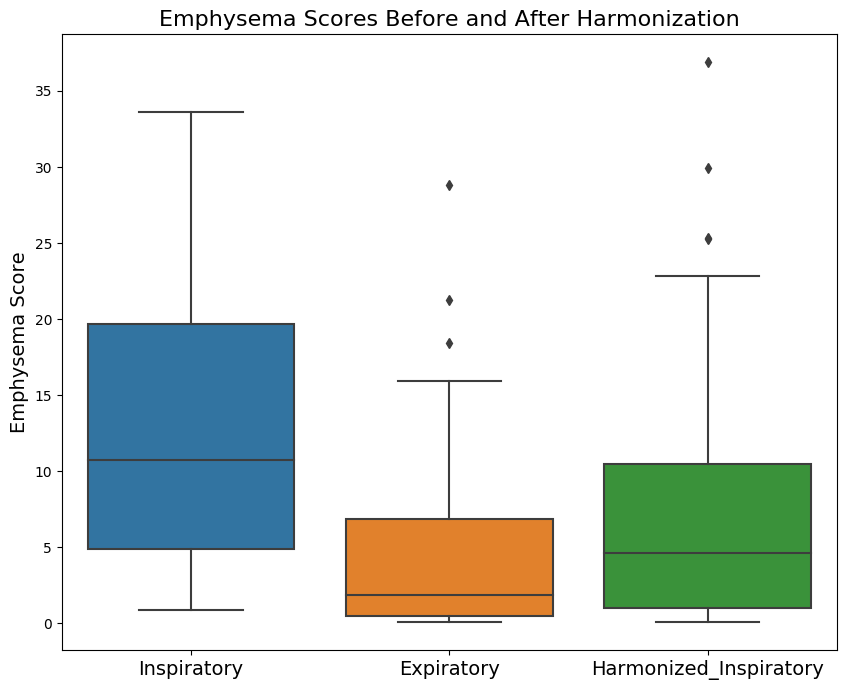

In [6]:
#Make a boxplot of before versus after harmonization
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(data = [insp_bone_emphysema, exp_std_emphysema, harm_insptoexp_std_emphysema], ax = ax)
ax.set_xticklabels(["Inspiratory", "Expiratory", "Harmonized_Inspiratory"], fontsize = 14)
ax.set_ylabel("Emphysema Score", fontsize=14)
plt.title("Emphysema Scores Before and After Harmonization", fontsize = 16)
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/quantitative/emphysema_score.tiff", dpi=300)
plt.show()

In [5]:
# Find the range of scores for the emphysema and showcase the median emphysema score 
insp_bone_emphysema = np.array(insp_bone_emphysema)
exp_std_emphysema = np.array(exp_std_emphysema)
harm_insptoexp_std_emphysema = np.array(harm_insptoexp_std_emphysema)

print(f"Inspiratory Emphysema Score Range: {np.min(insp_bone_emphysema):.3f}, {np.max(insp_bone_emphysema):.3f}")
print(f"Expiratory Emphysema Score Range: {np.min(exp_std_emphysema):.3f}, {np.max(exp_std_emphysema):.3f}")
print(f"Harmonized Inspiratory Emphysema Score Range: {np.min(harm_insptoexp_std_emphysema):.3f}, {np.max(harm_insptoexp_std_emphysema):.3f}")

print(f"Inspiratory Emphysema Score Median: {np.median(insp_bone_emphysema):.3f}")
print(f"Expiratory Emphysema Score Median: {np.median(exp_std_emphysema):.3f}")
print(f"Harmonized Inspiratory Emphysema Score Median: {np.median(harm_insptoexp_std_emphysema):.3f}")

Inspiratory Emphysema Score Range: 0.838, 33.611
Expiratory Emphysema Score Range: 0.058, 28.811
Harmonized Inspiratory Emphysema Score Range: 0.061, 36.883
Inspiratory Emphysema Score Median: 10.718
Expiratory Emphysema Score Median: 1.874
Harmonized Inspiratory Emphysema Score Median: 4.584
